# Offline Phase
Once the training snapshots have been generated and the folder list file has been created, we are ready to use the offline "solvers" to perform ROM analysis.

Before going on, change path into `TrainSet/Case_000_Re15.00_Ri0.20` and be sure to have `train_folders.txt` file into the `system` directory. Each solver is characterised by a specific dictionary to be stored into the `system` directory: as an example we report here the one for `ScalarPOD_Offline`:
```
Offline_parameters
{
    field    T;
    accuracy      0.99999;
    maxBasis 50;
    foldersList  (#include "train_folders.txt") ;
} 
```
The instructions for each folder can be found as a `README.md` inside each solver or inside the documentation in the Section related to the specific algorithm.

In this tutorial we are going to analyse the output of each offline solver, in particular the structure is the following:
- **Problem Reducibility** by checking the POD eigenvalues (or SVD singular values);
- **Comparison between EIM and GEIM** for various point spreads;
- **Analysis of the Lebesgue Constant for GEIM** for various point spreads;
- **Comparison of the train error** for different algorithms (POD, EIM, GEIM and WeakGreedy).

This notebook can be directly executed in the `TrainSet` to generate the images, here below are listed the required packages.

In [12]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import cm

var_names = ['T', 'U']
tex_var_names = ['T', '\mathbf{u}']

## Problem Reducibility
The eigenvalues $\{\lambda_n\}$ are loaded and plotted in terms of relative importance, with respect to the total sum, i.e.
\begin{equation*}
\frac{\lambda_n}{\sum_k\lambda_k}
\end{equation*}

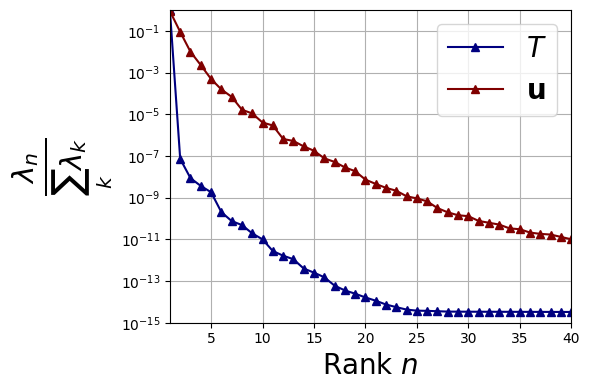

In [17]:
PODeigenvalues = dict()

PODeigFig = plt.figure( figsize= (6,4))
color = iter(cm.jet(np.linspace(0, 1, len(var_names))))

for ii, field in enumerate(var_names):
    PODeigenvalues[field] = np.loadtxt('./POD_'+field+'/'+field+'_POD_Offline_files/'+field+'EigenValues.txt')

    c = next(color)
    plt.semilogy(np.arange(1,PODeigenvalues[field].size+1,1),
                 PODeigenvalues[field]/sum(PODeigenvalues[field]), "-^", c=c, label = r"$" +tex_var_names[ii]+"$", linewidth=1.5)   

plt.xlabel(r"Rank $n$",fontsize=20)
plt.xticks(np.arange(0,40+1,5))
plt.xlim(1,40)
plt.ylim(1e-15, 1.01)
plt.ylabel(r"$\frac{\lambda_n}{\sum_k\lambda_k}$",fontsize=30)
plt.grid(which='major',linestyle='-')
plt.grid(which='minor',linestyle='--')
plt.legend(fontsize=20)

plt.tight_layout()
# PODeigFig.savefig(path+'/POD_eigenvalues.pdf', format='pdf', dpi=300, bbox_inches='tight')

It can be observed that the decrease for the eigenvalues of the velocity is much slower, showing that it is "less reducible" with respect to the velocity. Nevertheless, we can state that each of them is reducible.

## Comparison between EIM and GEIM

## Analysis of the Lebesgue Constant for GEIM

## Comparison of the train error